# Crafting a Story from a Dataset

## Influence of Covid-19 on Traffic Patterns

The Minnesota Department of Transportation (MnDOT) maintains data sets relating to traffic on state highways and major roads. This includes hourly volume counts at over 100 locations. To examine the effect of the pandemic on overall traffic flow, MnDOT has [compared traffic volume](https://edocs-public.dot.state.mn.us/edocs_public/DMResultSet/download?docId=12228064) in 2020 to a historical baseline from 2016-2019. Two major questions can be explored with this dataset. First, to what extent did traffic volume decline due to the pandemic? Additionally, how much of the pre-pandemic volume had been recovered by the end of the year?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Pre-processing

MnDOT is subdivided into [eight districts](https://www.dot.state.mn.us/information/districts.html). One of these covers the Minneapolis / St. Paul Twin Cities metropolitan area and is called the Metro District. The remaining districts are numbered from District 1 to District 8 (there is no District 5). The dataset contains one row for each district and an additional row indicating statewide changes.
There is one column for each day in the dataset. The set is updated regularly. When the set was retrieved, information was provided from January 1, 2020 to March 21, 2021. There is no clear guidance provided as to whether the columns representing 2021 are compared to the same historical baseline or if they are compared to 2020. Consequently, these will be omitted for this analysis.

The table is transposed so that the columns are time series and entries are converted to the correct data types.

In [2]:
traffic_df = pd.read_csv('Daily_Volume_Change_2020-11-22_update-12228064-v12.csv').T
traffic_df.columns = traffic_df.iloc[0]
traffic_df.drop('District', axis=0, inplace=True)
traffic_df.index = pd.to_datetime(traffic_df.index)
traffic_df = traffic_df.astype(float)
traffic_df = traffic_df[:'2020-12-31']
traffic_df['min'], traffic_df['max'] = traffic_df.min(axis=1), traffic_df.max(axis=1)

In [3]:
traffic_df.head()

District,MnDOT D1,MnDOT D2,MnDOT D3,MnDOT D4,MnDOT D6,MnDOT D7,MnDOT D8,MnDOT Metro,MnDOT Statewide,min,max
2020-01-01,-13.5,-28.7,-19.9,-19.1,-24.9,-25.9,-31.2,-37.8,-26.8,-37.8,-13.5
2020-01-02,8.8,6.2,8.6,10.0,4.6,9.9,4.9,3.8,6.4,3.8,10.0
2020-01-03,14.3,0.0,-2.2,0.5,1.8,-3.4,-6.0,4.6,2.2,-6.0,14.3
2020-01-04,6.8,-2.8,3.5,11.2,6.2,2.3,-0.6,2.6,3.7,-2.8,11.2
2020-01-05,-6.0,-14.0,-8.3,-6.0,-2.0,-1.8,-9.3,0.2,-4.8,-14.0,0.2


## Analysis

Plotting all time series on the same graph makes it clear that trends generally appear to hold across the state, although this correlation may weaken in the fall.

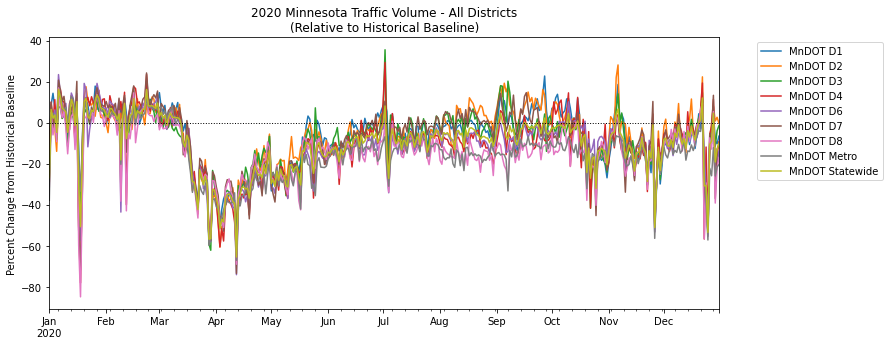

In [4]:
ymin, ymax = (-100, 50)
fig, ax = plt.subplots(figsize=(12,5));
plt.ylim=(ymin, ymax)
traffic_df.loc[:,'MnDOT D1':'MnDOT Statewide'].plot(ax=ax);
ax.axhline(linewidth=1, linestyle=':', color='k');
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left');
plt.xlim=(('2020-01-01','2020-12-31'))
plt.ylabel('Percent Change from Historical Baseline');
plt.title('2020 Minnesota Traffic Volume - All Districts\n(Relative to Historical Baseline)');

### Pre-Pandemic

For the first two months of the year, traffic volume was generally above the historical baseline. There is one noticeable drop in traffic between January 17th and 19th. This corresponds to a [major winter storm](https://www.mprnews.org/story/2020/01/18/morning-snow-then-winds-ramp-up-blizzard-conditions-western-minnesota) that hit District 8 particularly hard. Two additional storms hit the state in mid-February, with the second storm predominantly avoiding the Twin Cities region.

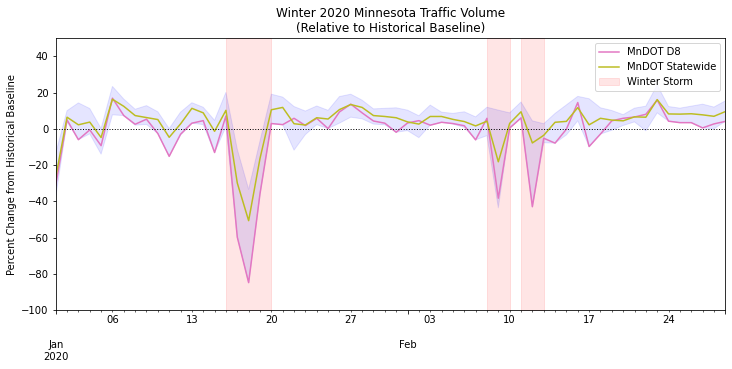

In [5]:
traffic_df.loc[:'2020-02-29', ['MnDOT D8', 'MnDOT Statewide']].plot(figsize=(12,5), color=['C6','C8'], ylim=(ymin, ymax));
plt.axhline(linewidth=1, linestyle=':', color='k');
plt.fill_betweenx(y=[ymin, ymax], x1='2020-01-16', x2='2020-01-20', color='r', alpha=0.1, label='Winter Storm');
plt.fill_betweenx(y=[ymin, ymax], x1='2020-02-08', x2='2020-02-10', color='r', alpha=0.1);
plt.fill_betweenx(y=[ymin, ymax], x1='2020-02-11', x2='2020-02-13', color='r', alpha=0.1);
plt.fill_between(x=traffic_df.index, y1=traffic_df['min'], y2=traffic_df['max'], color='b', alpha=0.1);
plt.title('Winter 2020 Minnesota Traffic Volume\n(Relative to Historical Baseline)');
plt.ylabel('Percent Change from Historical Baseline');
plt.legend();

### Early Pandemic

The pandemic initially hit Minnesota in March of 2020. Minnesota Governor Tim Walz issued three Executive Orders that had the potential to significantly impact traffic. The first issued was the second to take effect. This was an order to [close all public schools](https://www.lrl.mn.gov/archive/execorders/20-02.pdf) beginning on March 18th. The second was an order to [close bars, restaurants, and other public facilities](https://www.lrl.mn.gov/archive/execorders/20-04.pdf) beginning on March 17th. The last was a [stay-at-home order](https://www.lrl.mn.gov/archive/execorders/20-20.pdf) covering the period from March 27th to April 10th.
It appears that the decline in traffic may have begun before the Governor's initial Executive Orders. This would likely be due to a shift to remote work for a number of businesses. Additionally, there does not appear to be a sustained decline in traffic during the stay-at-home period.

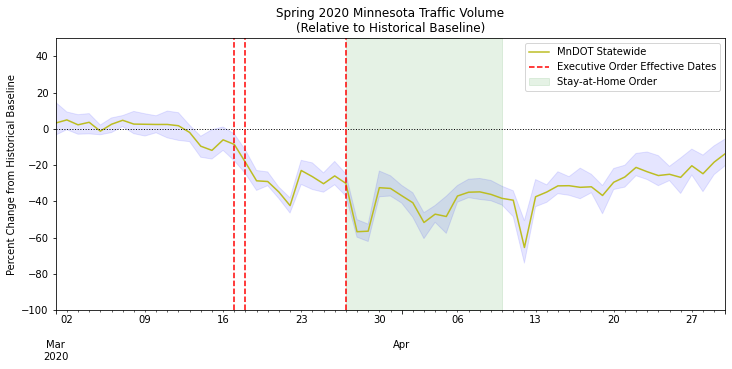

In [6]:
traffic_df.loc['2020-03-01':'2020-04-30', ['MnDOT Statewide']].plot(figsize=(12,5), color=['C8'], ylim=(ymin, ymax));
plt.axhline(linewidth=1, linestyle=':', color='k');
plt.axvline(x='2020-03-17', linewidth=1.5, linestyle='--', color='r', label='Executive Order Effective Dates');
plt.axvline(x='2020-03-18', linewidth=1.5, linestyle='--', color='r');
plt.axvline(x='2020-03-27', linewidth=1.5, linestyle='--', color='r');
plt.fill_betweenx(y=[ymin, ymax], x1='2020-03-27', x2='2020-04-10', color='g', alpha=0.1, label='Stay-at-Home Order');
plt.fill_between(x=traffic_df.index, y1=traffic_df['min'], y2=traffic_df['max'], color='b', alpha=0.1);
plt.title('Spring 2020 Minnesota Traffic Volume\n(Relative to Historical Baseline)');
plt.ylabel('Percent Change from Historical Baseline');
plt.legend();

### Summer

Traffic remained generally low over the summer, with a notable uptick in the days before Independence Day. This climb was most prominent in Districts 3 and 4. These Districts are known for a large number of resorts and lakes. Interestingly enough, there was a sizeable drop on the actual day of the 4th.

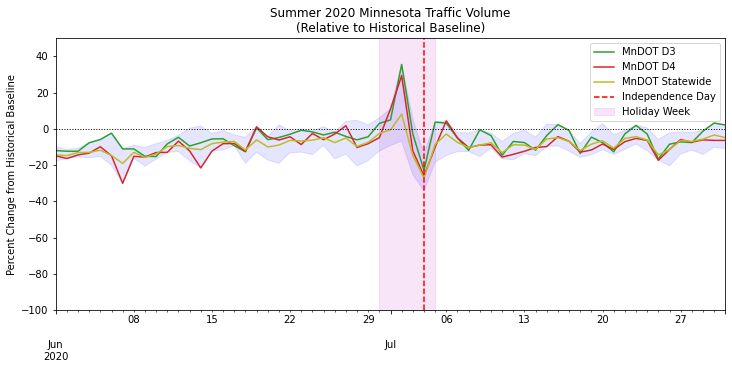

In [7]:
traffic_df.loc['2020-06-01':'2020-07-31', 
               ['MnDOT D3', 'MnDOT D4', 'MnDOT Statewide']].plot(figsize=(12,5), color=['C2', 'C3', 'C8'], ylim=(ymin, ymax));
plt.axhline(linewidth=1, linestyle=':', color='k');
plt.axvline(x='2020-07-04', linewidth=1.5, linestyle='--', color='r', label='Independence Day');
plt.fill_betweenx(y=[ymin, ymax], x1='2020-06-30', x2='2020-07-05', color='m', alpha=0.1, label='Holiday Week');
plt.fill_between(x=traffic_df.index, y1=traffic_df['min'], y2=traffic_df['max'], color='b', alpha=0.1);
plt.title('Summer 2020 Minnesota Traffic Volume\n(Relative to Historical Baseline)');
plt.ylabel('Percent Change from Historical Baseline');
plt.legend();

### Fatigue

It appears that later in the year, the district trends start to diverge. This is most obvious when comparing District 2 with the Metro District. The two seem to be fairly close until May, when they begin to separate. Beginning in August, District 2 spends the rest of the year near (and often above) the historical baseline, while the Metro District generally stays below the baseline. There appears to be a sustained gap between the two districts, raising the question as to whether there is a significant difference between the two.

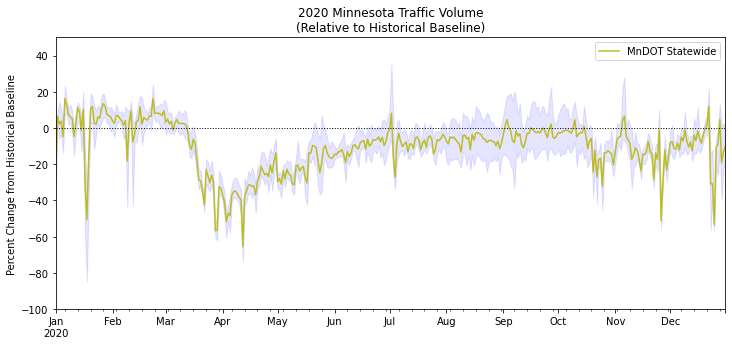

In [8]:
traffic_df.loc['2020-01-01':'2020-12-31', 
               ['MnDOT Statewide']].plot(figsize=(12,5), color=['C8'], ylim=(ymin, ymax));
plt.axhline(linewidth=1, linestyle=':', color='k');
plt.fill_between(x=traffic_df.index, y1=traffic_df['min'], y2=traffic_df['max'], color='b', alpha=0.1);
plt.title('2020 Minnesota Traffic Volume\n(Relative to Historical Baseline)');
plt.ylabel('Percent Change from Historical Baseline');
plt.legend();

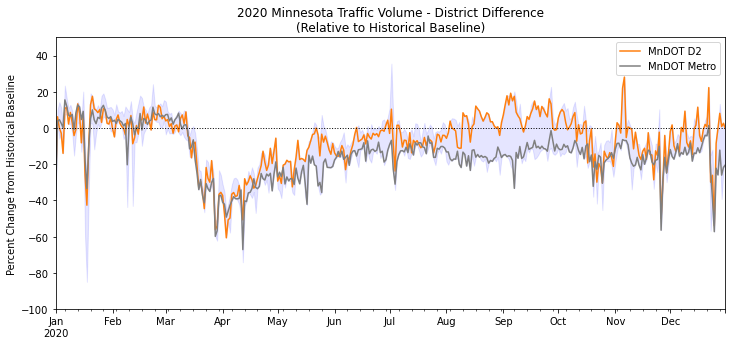

In [9]:
traffic_df.loc['2020-01-01':'2020-12-31', 
               ['MnDOT D2', 'MnDOT Metro']].plot(figsize=(12,5), color=['C1', 'C7'], ylim=(ymin, ymax));
plt.axhline(linewidth=1, linestyle=':', color='k');
plt.fill_between(x=traffic_df.index, y1=traffic_df['min'], y2=traffic_df['max'], color='b', alpha=0.1);
plt.title('2020 Minnesota Traffic Volume - District Difference\n(Relative to Historical Baseline)');
plt.ylabel('Percent Change from Historical Baseline');
plt.legend();

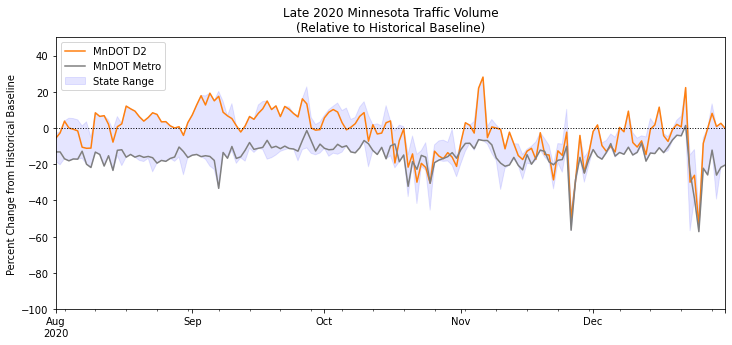

In [10]:
traffic_df.loc['2020-08-01':'2020-12-31', 
               ['MnDOT D2', 'MnDOT Metro']].plot(figsize=(12,5), color=['C1', 'C7'], ylim=(ymin, ymax));
plt.axhline(linewidth=1, linestyle=':', color='k');
plt.fill_between(x=traffic_df.index, y1=traffic_df['min'], y2=traffic_df['max'], color='b', alpha=0.1, label='State Range');
plt.title('Late 2020 Minnesota Traffic Volume\n(Relative to Historical Baseline)');
plt.ylabel('Percent Change from Historical Baseline');
plt.legend();

## Conclusions

It is clear from the data that Covid-19 had an impact on Minnesota traffic in 2020. It also appears as if the differences in political and cultural reactions to Covid-19 that were on display at a national level in 2020 may also have been demonstrated on Minnesota roads through the latter part of the year.

## Future Directions

This investigation raises several questions that could have major implications in a future event.
* Did the Governor's Executive Orders have any influence in the declining traffic volumes in March/April?
* Did the stay-at-home order have any effect?
* What external factors contributed to the divergence in traffic patterns through the summer and fall?